In [1]:
from warnings import filterwarnings
filterwarnings("ignore")
import pandas as pd

In [2]:
A=pd.read_csv("C:/Dataset/training_set.csv")




In [3]:
A.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [4]:
A.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [5]:
A.isna().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [6]:
for i in A.columns:
    if A[i].dtype=="object":
        t=A[i].mode()[0]
        A[i]=A[i].fillna(t)
    else:
        t=A[i].mean()
        A[i]=A[i].fillna(t)

In [7]:
A.isna().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 81, dtype: int64

In [8]:
con=[]
cat=[]
for i in A.columns:
    if A[i].dtypes=='object':
        cat.append(i)
    else:
        con.append(i)

In [9]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
A1=pd.DataFrame(ss.fit_transform(A[con]),columns=con)

In [10]:
outliers=[]
for i in A1.columns:
    outliers.extend(A1[(A1[i]>3)&(A1[i]<-3)].index)
   

In [11]:
outliers

[]

In [12]:
Y=A[["SalePrice"]]
X=A.drop(columns=["Id","SalePrice"],axis=1)

In [13]:
cat = []
con = []
for i in X.columns:
    if(X[i].dtypes == "object"):
        cat.append(i)
    else:
        con.append(i)

In [14]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
Ynew=pd.DataFrame(le.fit_transform(Y.SalePrice),columns=["Loan_Status"])
Ynew.head()

,Loan_Status
0,412
1,339
2,442
3,194
4,494


In [15]:
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()
X1 = pd.DataFrame(mm.fit_transform(X[con]),columns=con)
X2 = pd.get_dummies(X[cat])
Xnew = X1.join(X2)

In [16]:
Xnew.head()


,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0.235294,0.150685,0.033420,0.666667,0.500,0.949275,0.883333,0.12250,0.125089,0.0,...,0,0,0,1,0,0,0,0,1,0
1,0.000000,0.202055,0.038795,0.555556,0.875,0.753623,0.433333,0.00000,0.173281,0.0,...,0,0,0,1,0,0,0,0,1,0
2,0.235294,0.160959,0.046507,0.666667,0.500,0.934783,0.866667,0.10125,0.086109,0.0,...,0,0,0,1,0,0,0,0,1,0
3,0.294118,0.133562,0.038561,0.666667,0.500,0.311594,0.333333,0.00000,0.038271,0.0,...,0,0,0,1,1,0,0,0,0,0
4,0.235294,0.215753,0.060576,0.777778,0.500,0.927536,0.833333,0.21875,0.116052,0.0,...,0,0,0,1,0,0,0,0,1,0


In [17]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=21)

In [18]:
from keras.models import Sequential
from keras.layers import Dense

In [19]:
nn=Sequential()
nn.add(Dense(units=100,input_dim=(len(Xnew.columns)),activation="relu"))
nn.add(Dense(100,activation="relu"))
nn.add(Dense(1,activation="relu"))

In [20]:
nn.compile(optimizer='adam',loss="mse",metrics=['mse'])
model=nn.fit(xtrain,ytrain,validation_data=(xtest,ytest),epochs=10)

Epoch 1/10
37/37 [==============================] - 1s 10ms/step - loss: 38995283968.0000 - mse: 38995283968.0000 - val_loss: 39184490496.0000 - val_mse: 39184490496.0000
Epoch 2/10
37/37 [==============================] - 0s 4ms/step - loss: 38952706048.0000 - mse: 38952706048.0000 - val_loss: 39095259136.0000 - val_mse: 39095259136.0000
Epoch 3/10
37/37 [==============================] - 0s 4ms/step - loss: 38781390848.0000 - mse: 38781390848.0000 - val_loss: 38812377088.0000 - val_mse: 38812377088.0000
Epoch 4/10
37/37 [==============================] - 0s 4ms/step - loss: 38339768320.0000 - mse: 38339768320.0000 - val_loss: 38180433920.0000 - val_mse: 38180433920.0000
Epoch 5/10
37/37 [==============================] - 0s 4ms/step - loss: 37471326208.0000 - mse: 37471326208.0000 - val_loss: 37044334592.0000 - val_mse: 37044334592.0000
Epoch 6/10
37/37 [==============================] - 0s 4ms/step - loss: 36031262720.0000 - mse: 36031262720.0000 - val_loss: 35269885952.0000 - val_m

In [21]:
tr_err = model.history['loss']
ts_err = model.history['val_loss']

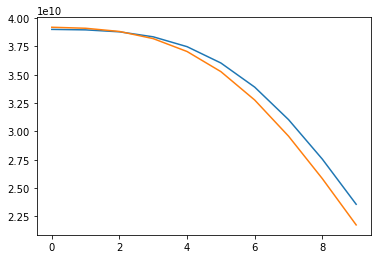

In [22]:
import matplotlib.pyplot as plt
plt.plot(tr_err)
plt.plot(ts_err)

In [23]:
nn.predict(xtrain)

37/37 [==============================] - 0s 2ms/step


array([[53046.508],
       [53831.027],
       [57479.207],
       ...,
       [56220.86 ],
       [54569.67 ],
       [52942.3  ]], dtype=float32)